Data loaded and preprocessed.
Features scaled.


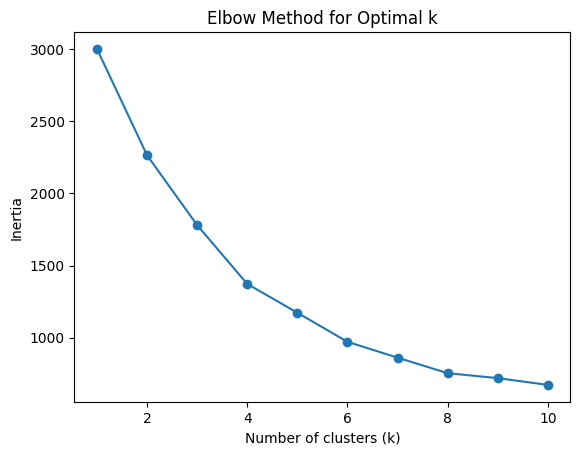

Enter the optimal number of clusters based on the elbow method:  8


K-Means clustering performed.


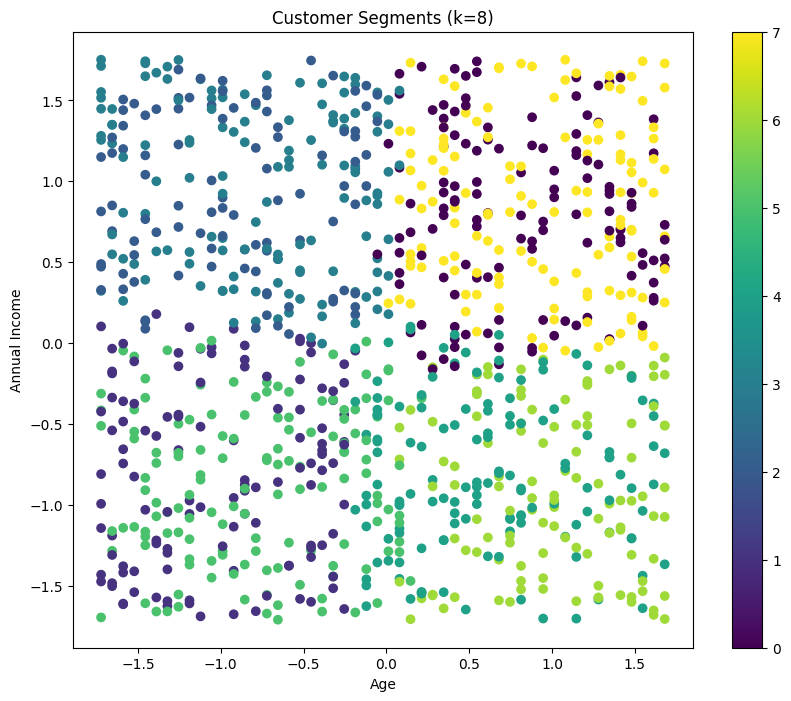


Cluster 0:
              Age  Annual_Income  Spending_Score
count  127.000000     127.000000      127.000000
mean    56.055118   54630.393701       76.937008
std      7.453887    8220.283779       13.776993
min     43.000000   39574.000000       52.000000
25%     50.000000   48668.500000       65.500000
50%     54.000000   54666.000000       78.000000
75%     63.000000   61218.500000       88.000000
max     69.000000   69756.000000       99.000000

---

Cluster 1:
              Age  Annual_Income  Spending_Score
count  120.000000     120.000000      120.000000
mean    28.750000   29348.391667       27.508333
std      7.456597    8756.548685       14.222716
min     18.000000   15338.000000        1.000000
25%     21.750000   21513.500000       17.750000
50%     28.000000   29475.500000       27.000000
75%     36.000000   36592.500000       39.000000
max     41.000000   44975.000000       55.000000

---

Cluster 2:
              Age  Annual_Income  Spending_Score
count  100.000000     1

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Load and preprocess the data
def load_and_preprocess_data(file_path):
    # For this example, we'll create sample data
    # In a real scenario, you would load your data from a CSV file
    np.random.seed(42)
    n_customers = 1000
    
    data = pd.DataFrame({
        'CustomerID': range(1, n_customers + 1),
        'Age': np.random.randint(18, 70, n_customers),
        'Annual_Income': np.random.randint(15000, 70000, n_customers),
        'Spending_Score': np.random.randint(1, 100, n_customers)
    })
    
    return data

# Perform feature scaling
def scale_features(data):
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(data[['Age', 'Annual_Income', 'Spending_Score']])
    return scaled_features

# Determine optimal number of clusters using the elbow method
def find_optimal_clusters(data, max_k):
    inertias = []
    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)
    
    plt.plot(range(1, max_k+1), inertias, marker='o')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal k')
    plt.show()

# Perform K-Means clustering
def perform_kmeans(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data)
    return kmeans.labels_

# Visualize the clusters
def visualize_clusters(data, labels, n_clusters):
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
    plt.colorbar(scatter)
    plt.xlabel('Age')
    plt.ylabel('Annual Income')
    plt.title(f'Customer Segments (k={n_clusters})')
    plt.show()

# Analyze and interpret the clusters
def analyze_clusters(original_data, labels, n_clusters):
    original_data['Cluster'] = labels
    for i in range(n_clusters):
        cluster_data = original_data[original_data['Cluster'] == i]
        print(f"\nCluster {i}:")
        print(cluster_data[['Age', 'Annual_Income', 'Spending_Score']].describe())
        print("\n---")

# Main function to run the segmentation
def main():
    # Load and preprocess the data
    data = load_and_preprocess_data('customer_data.csv')
    print("Data loaded and preprocessed.")

    # Scale the features
    scaled_features = scale_features(data)
    print("Features scaled.")

    # Find the optimal number of clusters
    max_k = 10
    find_optimal_clusters(scaled_features, max_k)
    
    # Based on the elbow method, let's choose the optimal number of clusters
    optimal_k = int(input("Enter the optimal number of clusters based on the elbow method: "))

    # Perform K-Means clustering
    labels = perform_kmeans(scaled_features, optimal_k)
    print("K-Means clustering performed.")

    # Visualize the clusters
    visualize_clusters(scaled_features, labels, optimal_k)

    # Analyze and interpret the clusters
    analyze_clusters(data, labels, optimal_k)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(scaled_features, labels)
    print(f"The average silhouette score is: {silhouette_avg}")

if __name__ == "__main__":
    main()